<a href="https://colab.research.google.com/github/sergioo-herreraa/Digit-Recognition-P1/blob/main/Digit_Recognition_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/sergioo-herreraa/Digit-Recognition-P1.git

Cloning into 'Digit-Recognition'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 91 (delta 44), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (91/91), 17.94 MiB | 10.94 MiB/s, done.
Resolving deltas: 100% (44/44), done.


In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('/content/Digit-Recognition-P1')
from utils import *
from linear_regression import *
from svm import *
from softmax import *
from features import *
from kernel import *

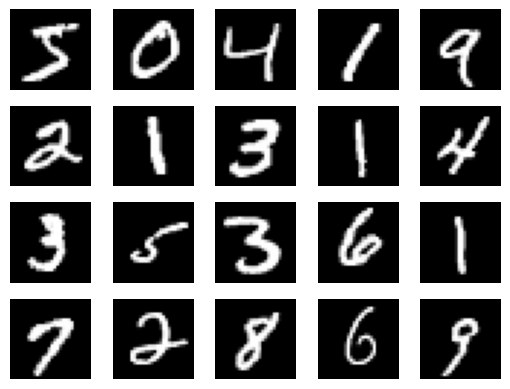

In [ ]:
#######################################################################
# 1. Introduction
#######################################################################
path='/content/Digit-Recognition-P1/Datasets/mnist.pkl.gz'
# Load MNIST data:
train_x, train_y, test_x, test_y = get_MNIST_data(path)
# Plot the first 20 images of the training set.
plot_images(train_x[0:20, :])

In [ ]:
#######################################################################
# 3. Support Vector Machine
#######################################################################

# TODO: first fill out functions in svm.py, or the functions below will not work

def run_svm_one_vs_rest_on_MNIST():
    """
    Trains svm, classifies test data, computes test error on test set

    Returns:
        Test error for the binary svm
    """
    train_x, train_y, test_x, test_y = get_MNIST_data(path)
    train_y[train_y != 0] = 1
    test_y[test_y != 0] = 1
    pred_test_y = one_vs_rest_svm(train_x, train_y, test_x)
    test_error = compute_test_error_svm(test_y, pred_test_y)
    return test_error


print('SVM one vs. rest test_error:', run_svm_one_vs_rest_on_MNIST())


def run_multiclass_svm_on_MNIST():
    """
    Trains svm, classifies test data, computes test error on test set

    Returns:
        Test error for the binary svm
    """
    train_x, train_y, test_x, test_y = get_MNIST_data(path)
    pred_test_y = multi_class_svm(train_x, train_y, test_x)
    test_error = compute_test_error_svm(test_y, pred_test_y)
    return test_error


print('Multiclass SVM test_error:', run_multiclass_svm_on_MNIST())

SVM one vs. rest test_error: 0.007499999999999951
Multiclass SVM test_error: 0.08189999999999997


In [ ]:
#######################################################################
# 4. Multinomial (Softmax) Regression and Gradient Descent
#######################################################################

# TODO: first fill out functions in softmax.py, or run_softmax_on_MNIST will not work


def run_softmax_on_MNIST(temp_parameter=1):
    """
    Trains softmax, classifies test data, computes test error, and plots cost function

    Runs softmax_regression on the MNIST training set and computes the test error using
    the test set. It uses the following values for parameters:
    alpha = 0.3
    lambda = 1e-4
    num_iterations = 150

    Saves the final theta to ./theta.pkl.gz

    Returns:
        Final test error
    """
    path_to_theta="content/Digit-Recognition/theta.pkl.gz"
    train_x, train_y, test_x, test_y = get_MNIST_data(path)
    theta, cost_function_history = softmax_regression(train_x, train_y, temp_parameter, alpha=0.3, lambda_factor=1.0e-4, k=10, num_iterations=150)
    plot_cost_function_over_time(cost_function_history)
    test_error = compute_test_error(test_x, test_y, theta, temp_parameter)
    # Save the model parameters theta obtained from calling softmax_regression to disk.
    write_pickle_data(theta, path_to_theta)
    train_y_mod3, test_y_mod3 = update_y(train_y, test_y)
    print('test_error_mod3: ', compute_test_error_mod3(test_x, test_y_mod3, theta, temp_parameter))
    return test_error


print('softmax test_error=', run_softmax_on_MNIST(temp_parameter=1))

KeyboardInterrupt: 

In [ ]:
#######################################################################
# 6. Changing Labels
#######################################################################

def run_softmax_on_MNIST_mod3(temp_parameter=1):
    """
    Trains Softmax regression on digit (mod 3) classifications.

    See run_softmax_on_MNIST for more info.
    """
    path_to_theta="./theta_mod3.pkl.gz"
    train_x, train_y, test_x, test_y = get_MNIST_data(path)
    train_y, test_y = update_y(train_y, test_y)
    theta, cost_function_history = softmax_regression(train_x, train_y, temp_parameter, alpha=0.3, lambda_factor=1.0e-4, k=10, num_iterations=150)
    plot_cost_function_over_time(cost_function_history)
    write_pickle_data(theta, path_to_theta)
    test_error = compute_test_error(test_x, test_y, theta, temp_parameter)

    return test_error

run_softmax_on_MNIST_mod3(temp_parameter=1)

In [ ]:
#######################################################################
# Dimensionality reduction via PCA
#######################################################################

n_components = 18

train_x, train_y, test_x, test_y = get_MNIST_data(path)
train_x_centered, feature_means = center_data(train_x)
pcs = principal_components(train_x_centered)
train_pca = project_onto_PC(train_x, pcs, n_components, feature_means)
test_pca = project_onto_PC(test_x, pcs, n_components, feature_means)

theta, cost_function_history = softmax_regression(train_pca, train_y, temp_parameter, alpha=0.3, lambda_factor=1.0e-4, k=10, num_iterations=150)
test_error = compute_test_error(test_pca, test_y, theta, temp_parameter)

# Use the plot_PC function in features.py to produce scatterplot
#       of the first 100 MNIST images, as represented in the space spanned by the
#       first 2 principal components found above.
plot_PC(train_x[range(000, 100), ], pcs, train_y[range(000, 100)], feature_means)#feature_means added since release


# Use the reconstruct_PC function in features.py to show
#       the first and second MNIST images as reconstructed solely from
#       their 18-dimensional principal component representation.
#       Compare the reconstructed images with the originals.
firstimage_reconstructed = reconstruct_PC(train_pca[0, ], pcs, n_components, train_x, feature_means)
plot_images(firstimage_reconstructed)
plot_images(train_x[0, ])

secondimage_reconstructed = reconstruct_PC(train_pca[1, ], pcs, n_components, train_x, feature_means)
plot_images(secondimage_reconstructed)
plot_images(train_x[1, ])


In [ ]:
#######################################################################
# Cubic Features (10-dimensional cubic PCA features)
#######################################################################
n_components = 10

###Correction note:  the following 4 lines have been modified since release.
train_x_centered, feature_means = center_data(train_x)
pcs = principal_components(train_x_centered)
train_pca10 = project_onto_PC(train_x, pcs, n_components, feature_means)
test_pca10 = project_onto_PC(test_x, pcs, n_components, feature_means)

train_cube = cubic_features(train_pca10)
test_cube = cubic_features(test_pca10)
# train_cube (and test_cube) is a representation of our training (and test) data
# after applying the cubic kernel feature mapping to the 10-dimensional PCA representations.


train_x, train_y, test_x, test_y = get_MNIST_data(path)
theta, cost_function_history = softmax_regression(train_cube, train_y, temp_parameter, alpha=0.3, lambda_factor=1.0e-4, k=10, num_iterations=150)
test_error = compute_test_error(test_cube, test_y, theta, temp_parameter)

#######################################################################
# Polynomial SVM Using scikit-learn
#######################################################################
preds_y = multi_class_svm(train_pca10, train_y, test_pca10, kernel='poly', degree='3')
print(compute_test_error_svm(test_y, preds_y))

#######################################################################
# RBF SVM Using scikit-learn
#######################################################################
preds_y = multi_class_svm(train_pca10, train_y, test_pca10, kernel='rbf')
print(compute_test_error_svm(test_y, preds_y))
